In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("dataset_2_1.csv")

# Filter out unrealistic ages
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)].copy()

# Normalize gender values
def normalize_gender(g):
    g = str(g).strip().lower()
    if g in ['male', 'm', 'man', 'male-ish', 'maile', 'mal', 'msle', 'mail', 'cis male']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'femake', 'cis female', 'female (cis)']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(normalize_gender)

df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
bins = [0, 18, 25, 35, 50, 100]
labels = ['<18', '18-25', '26-35', '36-50', '50+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

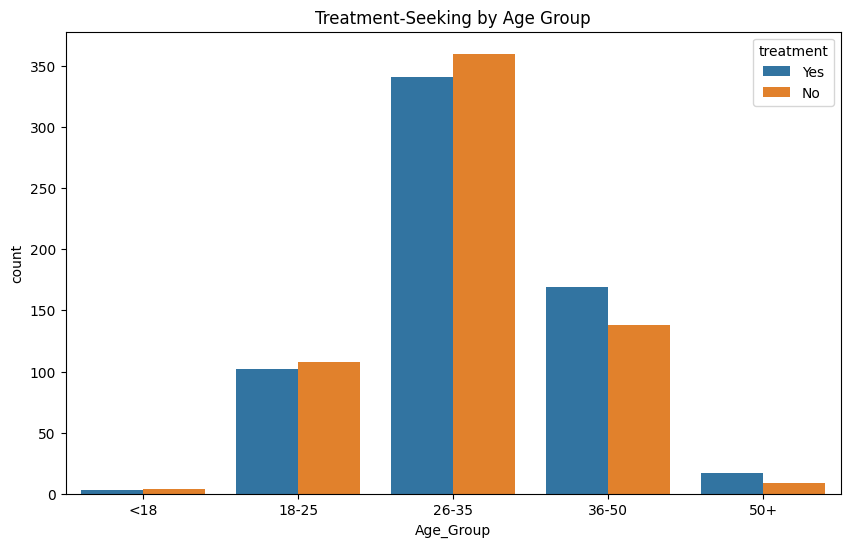

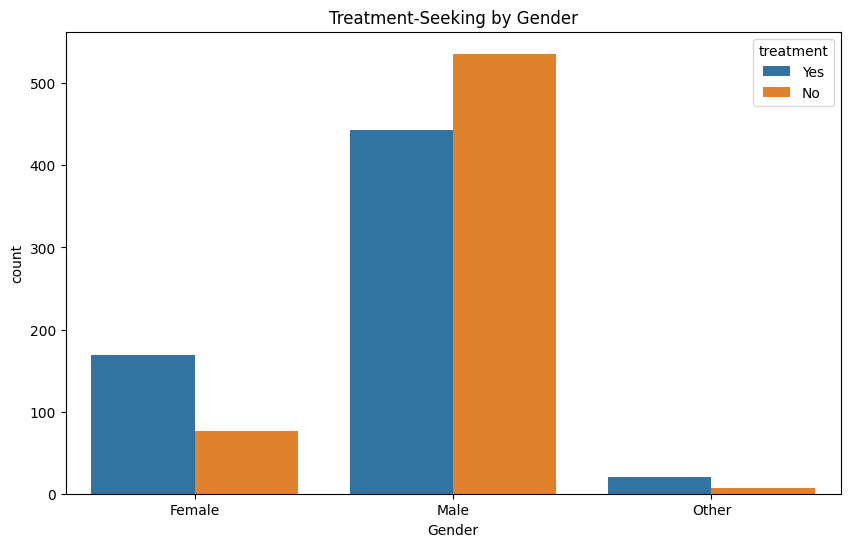

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='treatment')
plt.title('Treatment-Seeking by Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title('Treatment-Seeking by Gender')
plt.show()

In [ ]:
# Check missing values
df.isnull().sum()

# Drop columns with too many missing values or impute as needed
df = df.dropna(subset=['Age', 'Gender', 'treatment'])  # essential fields

# You can fill missing values where appropriate:
df['self_employed'].fillna('No', inplace=True)

/tmp/ipython-input-6-3838892601.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('No', inplace=True)


In [ ]:
# Group countries into regions manually or via dictionary
def map_region(country):
    if country in ['United States', 'Canada']:
        return 'North America'
    elif country in ['United Kingdom', 'Germany', 'France']:
        return 'Europe'
    else:
        return 'Other'

df['Region'] = df['Country'].apply(map_region)

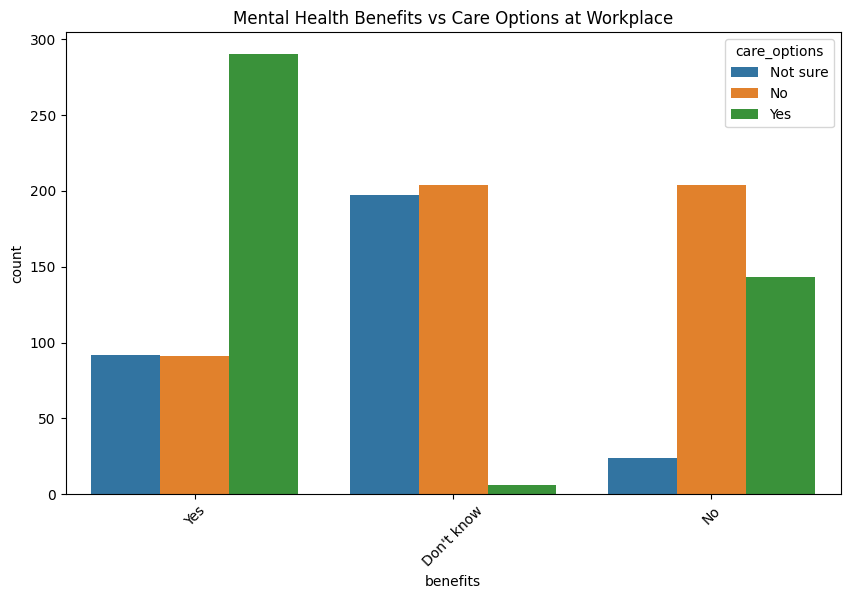

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='benefits', hue='care_options')
plt.title('Mental Health Benefits vs Care Options at Workplace')
plt.xticks(rotation=45)
plt.show()

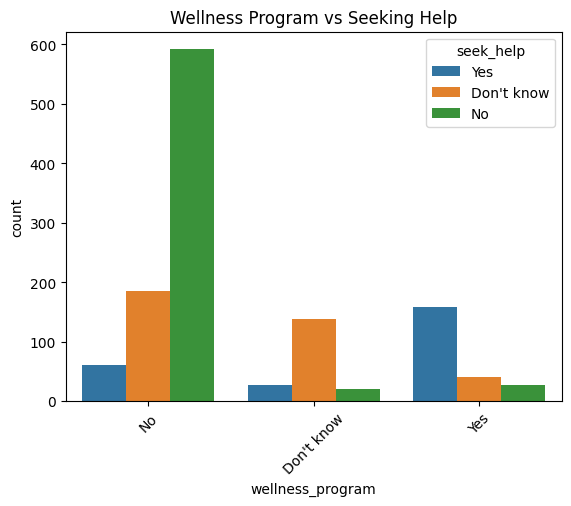

In [ ]:
sns.countplot(data=df, x='wellness_program', hue='seek_help')
plt.title('Wellness Program vs Seeking Help')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('dataset_2_1.csv')

# Drop rows with missing target
df = df.dropna(subset=['treatment'])

# Target: binary encoding
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

In [ ]:
def clean_gender(g):
    g = str(g).strip().lower()
    if g in ['male', 'm', 'man']:
        return 'Male'
    elif g in ['female', 'f', 'woman']:
        return 'Female'
    elif 'trans' in g:
        return 'Trans'
    else:
        return 'Other'

df['Gender_Clean'] = df['Gender'].apply(clean_gender)
df['Age'] = df['Age'].clip(upper=65, lower=18)  # fix outliers

# Encode relevant features
features = ['Age', 'Gender_Clean', 'family_history', 'self_employed',
            'work_interfere', 'remote_work', 'tech_company',
            'benefits', 'care_options', 'wellness_program', 'seek_help']

df = df[features + ['treatment']].dropna()

# One-hot encode categoricals
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('treatment', axis=1)
y = df_encoded['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 3. SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
print("Logistic Regression:\n", classification_report(y_test, log_pred))
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("SVM:\n", classification_report(y_test, svm_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.88      0.62      0.72        68
           1       0.82      0.95      0.88       128

    accuracy                           0.84       196
   macro avg       0.85      0.79      0.80       196
weighted avg       0.84      0.84      0.83       196

Random Forest:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66        68
           1       0.81      0.85      0.83       128

    accuracy                           0.78       196
   macro avg       0.75      0.74      0.75       196
weighted avg       0.77      0.78      0.77       196

SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.65      1.00      0.79       128

    accuracy                           0.65       196
   macro avg       0.33      0.50      0.40       196
weighted avg       0.43      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
